# Imports

In [409]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Reading the Data from kaggle environment

In [410]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [411]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

## Check null values

In [412]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [413]:
ids = test_data['PassengerId']

train_data['Age'] = train_data['Age'].fillna(train_data.Age.median())
test_data['Age'] = test_data['Age'].fillna(test_data.Age.median())

# train_data['Cabin'] = train_data['Cabin'].fillna(train_data.Cabin.mode()[0])
# test_data['Cabin'] = test_data['Cabin'].fillna(test_data.Cabin.mode()[0])

train_data.drop(columns=['PassengerId','Name','Cabin', 'Ticket'], inplace=True)
test_data.drop(columns=['PassengerId','Name','Cabin', 'Ticket'], inplace=True)

train_data['Embarked'] = train_data['Embarked'].fillna(train_data.Embarked.mode()[0])
test_data['Embarked'] = train_data['Embarked'].fillna(train_data.Embarked.mode()[0])

test_data['Fare'] = test_data['Fare'].fillna(test_data.Fare.mean())

In [414]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Check for duplicates

In [415]:
train_data.duplicated().sum()

116

# Exploratory Data Analysis

In [416]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Percentage of males vs females survivors

In [417]:
train_data.loc[train_data.Sex == 'female']['Survived'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [418]:
train_data.loc[train_data.Sex == 'male']['Survived'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

## Encoding Features

In [419]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [420]:
train_data['Sex'] = train_data['Sex'].map({'male':0,'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'S':0,'C':1,'Q':2})
# train_data.Cabin = train_data.Cabin.astype('category').cat.codes
# train_data.Ticket = train_data.Ticket.astype('category').cat.codes

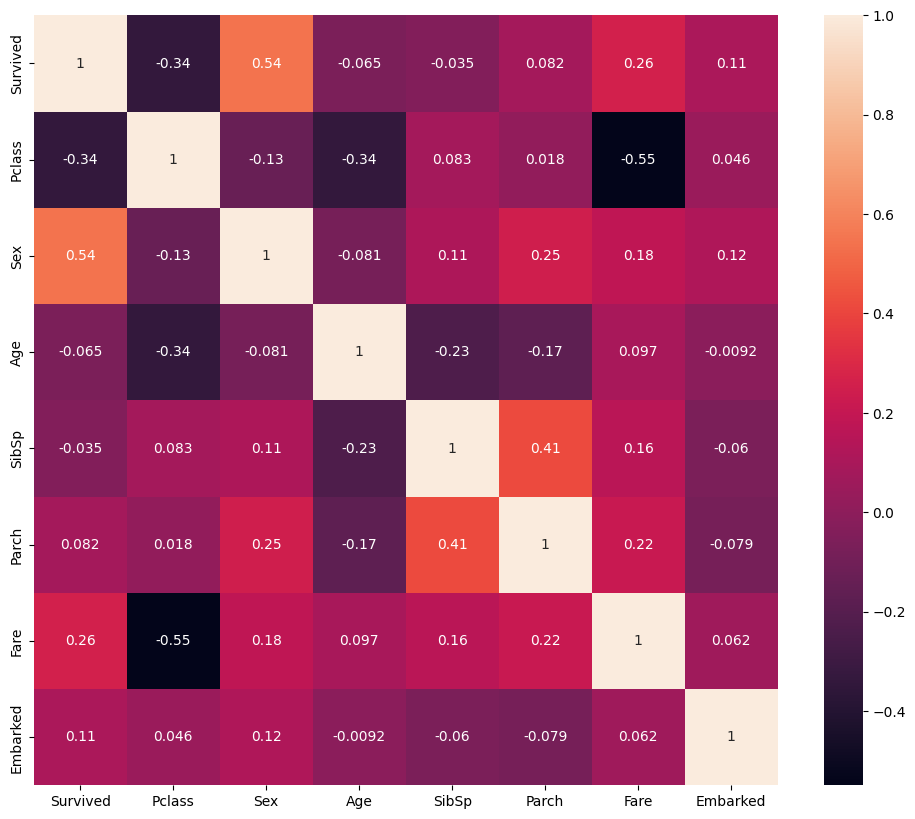

In [421]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True);

# Training

In [422]:
from sklearn.ensemble import RandomForestClassifier

In [423]:
y = train_data["Survived"]
X = train_data.drop(columns=['Survived'])

In [424]:
model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
model.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

# Testing

In [425]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,S
1,3,female,47.0,1,0,7.0000,C
2,2,male,62.0,0,0,9.6875,S
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [426]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [427]:
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':1,'Q':2})
# test_data.Cabin = test_data.Cabin.astype('category').cat.codes
# test_data.Ticket = test_data.Ticket.astype('category').cat.codes

In [428]:
X_test = test_data

In [429]:
predictions = model.predict(test_data)

In [430]:
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('202001053.csv', index=False)

# Submit using the notebook 
- Click on Save Version when you finish
- Make sure to select (Save & Run all)